## **8th Annual WiDS Datathon Challenges:** 

### **Unraveling the Mysteries of the Female Brain**

# PREPROCESSING

* [0. Imports](#0-imports)
* [1. Handling Missing Data](#1-handling-missing-data)
* [2. Feature Engineering](#2-feature-engineering)
* [3. Dimensionality reduction](#3-dimensionality-reduction)
* [4. Train Test Split](#4-train-test-split)
* [5. Data Export](#5-data-export)

# 0. Imports

In [1]:
import sys
import re
import math
import openpyxl
import joblib

import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import sklearn
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
)
from sklearn.model_selection import (
    train_test_split,
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE


print(f"python version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"plotly version: {py.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scipy.__version__}")

python version: 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
pandas version: 2.2.3
numpy version: 1.26.4
matplotlib version: 3.10.0
seaborn version: 0.13.2
plotly version: 5.24.1
scikit-learn version: 1.5.2
scipy version: 1.15.2


In [2]:
# data paths

file_path_train_cat_md = "../data/raw/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"
file_path_train_fun_cm = "../data/raw/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
file_path_train_quan_md = "../data/raw/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
file_path_train_sol = "../data/raw/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"

In [3]:
# uploading data

train_cat = pd.read_excel(file_path_train_cat_md)
train_fcm = pd.read_csv(file_path_train_fun_cm)
train_quan = pd.read_excel(file_path_train_quan_md)
train_sol = pd.read_excel(file_path_train_sol)

In [4]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx - records:")
print(train_cat.shape[0])
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv - records:")
print(train_fcm.shape[0])
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx - records:")
print(train_quan.shape[0])
print("\nTRAINING_SOLUTIONS.xlsx - records:")
print(train_sol.shape[0])


TRAIN_CATEGORICAL_METADATA.xlsx - records:
1213

TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv - records:
1213

TRAIN_QUANTITATIVE_METADATA.xlsx - records:
1213

TRAINING_SOLUTIONS.xlsx - records:
1213


# 1. Handling Missing Data

### Handling null values

In [5]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
print(train_cat.isnull().sum())


TRAIN_CATEGORICAL_METADATA.xlsx
participant_id                        0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P2_Edu              198
Barratt_Barratt_P2_Occ              222
dtype: int64


PreInt_Demos_Fam_Child_Ethnicity 

✅  3 = Unknown (from data dictionary)

In [6]:
train_cat.fillna({'PreInt_Demos_Fam_Child_Ethnicity': 3}, inplace=True)

PreInt_Demos_Fam_Child_Race

✅  10 = Unknown (from data dictionary)

In [7]:
train_cat.fillna({'PreInt_Demos_Fam_Child_Race': 10}, inplace=True)

In [8]:
columns=train_cat.columns

In [9]:
for col in columns:
    print(f"Column: {col}")
    print(train_cat.groupby([col]).size())

Column: participant_id
participant_id
00aIpNTbG5uh    1
00fV0OyyoLfw    1
04X1eiS79T4B    1
05ocQutkURd6    1
06YUNBA9ZRLq    1
               ..
zpU7rEseBMH8    1
zpr8w4jCfVPe    1
zwBG0rZ05Mcb    1
zwXD5v17Rx01    1
zwjJWCRzKhDz    1
Length: 1213, dtype: int64
Column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year
2015     36
2016    191
2017    254
2018    415
2019    312
2020      5
dtype: int64
Column: Basic_Demos_Study_Site
Basic_Demos_Study_Site
1    652
2     11
3    430
4    120
dtype: int64
Column: PreInt_Demos_Fam_Child_Ethnicity
PreInt_Demos_Fam_Child_Ethnicity
0.0    777
1.0    296
2.0     77
3.0     63
dtype: int64
Column: PreInt_Demos_Fam_Child_Race
PreInt_Demos_Fam_Child_Race
0.0     573
1.0     181
2.0     128
3.0      30
4.0      10
7.0       2
8.0     195
9.0      23
10.0     65
11.0      6
dtype: int64
Column: MRI_Track_Scan_Location
MRI_Track_Scan_Location
1.0    179
2.0    532
3.0    463
4.0     36
dtype: int64
Column: Barratt_Barratt_P1_Edu
Barratt_Barratt_P1_Ed

In [10]:
# Print rows where 'MRI_Track_Scan_Location' column has missing values (NaN)
missing_values_rows = train_cat[train_cat['MRI_Track_Scan_Location'].isna()]

missing_values_rows.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
998,UmN79UUheNpw,2016,1,0.0,0.0,NaN,21.0,25.0,18.0,45.0
1095,x0yuhCZiG4mU,2016,1,0.0,0.0,NaN,18.0,40.0,18.0,45.0
1200,zSOTbT8r7FQ2,2016,1,0.0,10.0,NaN,15.0,0.0,21.0,35.0


In [11]:
# Print rows where 'MRI_Track_Scan_Location' column has missing values (NaN)
df = train_cat[train_cat['Basic_Demos_Study_Site']==1]

df.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,652.000000,652.0,652.000000,652.000000,649.000000,646.000000,639.000000,550.00000,535.000000
mean,2017.203988,1.0,0.613497,2.592025,1.876733,17.284830,24.241002,16.32000,28.794393
std,1.149280,0.0,0.904504,3.621806,0.601103,3.869898,16.978083,4.08018,13.941920
min,2015.000000,1.0,0.000000,0.000000,1.000000,3.000000,0.000000,3.00000,0.000000
25%,2016.000000,1.0,0.000000,0.000000,2.000000,15.000000,0.000000,12.00000,15.000000
50%,2017.000000,1.0,0.000000,1.000000,2.000000,18.000000,30.000000,18.00000,35.000000
75%,2018.000000,1.0,1.000000,4.000000,2.000000,21.000000,40.000000,21.00000,40.000000
max,2019.000000,1.0,3.000000,11.000000,4.000000,21.000000,45.000000,21.00000,45.000000


In [12]:
# Print rows where 'MRI_Track_Scan_Location' column has missing values (NaN)
df = train_cat[(train_cat['Basic_Demos_Study_Site'] == 1) & (train_cat['Basic_Demos_Enroll_Year'] == 2016)]

df.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,170.0,170.0,170.000000,170.000000,167.000000,168.000000,167.000000,130.00000,130.000000
mean,2016.0,1.0,1.011765,4.005882,1.245509,17.000000,22.754491,16.50000,27.653846
std,0.0,0.0,1.221059,4.194244,0.431683,3.962398,17.300138,4.18052,13.909849
min,2016.0,1.0,0.000000,0.000000,1.000000,3.000000,0.000000,3.00000,0.000000
25%,2016.0,1.0,0.000000,0.000000,1.000000,15.000000,0.000000,12.00000,15.000000
50%,2016.0,1.0,0.000000,2.000000,1.000000,18.000000,30.000000,18.00000,30.000000
75%,2016.0,1.0,2.000000,8.000000,1.000000,21.000000,35.000000,21.00000,35.000000
max,2016.0,1.0,3.000000,10.000000,2.000000,21.000000,45.000000,21.00000,45.000000


In [13]:
df

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
10,0JhQVAT7btJ5,2016,1,3.0,10.0,1.0,18.0,35.0,12.0,30.0
16,0ST9wPiJpQ8h,2016,1,0.0,4.0,1.0,21.0,35.0,21.0,15.0
25,1CrYokgmRpSg,2016,1,0.0,0.0,2.0,15.0,15.0,21.0,0.0
28,1HthYue8JWqZ,2016,1,1.0,2.0,1.0,21.0,40.0,12.0,5.0
29,1iFfsUtpS5rB,2016,1,0.0,0.0,2.0,21.0,0.0,18.0,35.0
...,...,...,...,...,...,...,...,...,...,...
1163,z1FVD7d0BGpV,2016,1,3.0,10.0,1.0,18.0,45.0,18.0,0.0
1195,zQHCPgcPgAbd,2016,1,2.0,8.0,1.0,15.0,25.0,NaN,NaN
1197,ZrEocbbTa2lB,2016,1,2.0,0.0,2.0,21.0,40.0,21.0,40.0
1200,zSOTbT8r7FQ2,2016,1,0.0,10.0,NaN,15.0,0.0,21.0,35.0


In [14]:
counts = train_cat.groupby(['Basic_Demos_Enroll_Year','MRI_Track_Scan_Location', 'Basic_Demos_Study_Site']).size()
print(counts)

Basic_Demos_Enroll_Year  MRI_Track_Scan_Location  Basic_Demos_Study_Site
2015                     1.0                      1                          35
                                                  2                           1
2016                     1.0                      1                         126
                                                  2                          10
                                                  3                           7
                         2.0                      1                          41
                                                  3                           4
2017                     2.0                      1                         159
                                                  3                          50
                         3.0                      1                          17
                                                  3                          27
                         4.0                   

I would fill it with 1

In [15]:
train_cat.fillna({'MRI_Track_Scan_Location': 1}, inplace=True)

Cheking Year, Scan Location and Study Site

In [16]:
columns='Basic_Demos_Enroll_Year','Basic_Demos_Study_Site', 'MRI_Track_Scan_Location'

In [17]:
for col in columns:
    print(f"Column: {col}")
    print(train_cat.groupby([col]).size())

Column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year
2015     36
2016    191
2017    254
2018    415
2019    312
2020      5
dtype: int64
Column: Basic_Demos_Study_Site
Basic_Demos_Study_Site
1    652
2     11
3    430
4    120
dtype: int64
Column: MRI_Track_Scan_Location
MRI_Track_Scan_Location
1.0    182
2.0    532
3.0    463
4.0     36
dtype: int64


### ❌ **since there were previously significant errors in the test set and in the training set - check the test set!**

In [18]:
file_path_test_cat = "../data/raw/TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_test_cat)

In [19]:
for col in columns:
    print(f"Column: {col}")
    print(test_cat.groupby([col]).size())

Column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year
2019      1
2020      2
2021      1
2022    232
2023     68
dtype: int64
Column: Basic_Demos_Study_Site
Basic_Demos_Study_Site
4    301
5      3
dtype: int64
Column: MRI_Track_Scan_Location
MRI_Track_Scan_Location
3    110
4    194
dtype: int64


TRAIN SET and TEST SET:

Treating these cases as outliers might improve model performance.

*Basic_Demos_Enroll_Year*

2015     35

2020      5

*Basic_Demos_Study_Site*

2     11


*MRI_Track_Scan_Location*

4.0     36


### ⚠️ **Potential Issues with Enrollment Year, Study Site, and Scan Location**

We observed significant differences between the training and test sets in three key columns:  
**`Basic_Demos_Enroll_Year`**, **`Basic_Demos_Study_Site`**, and **`MRI_Track_Scan_Location`**.  
These variables reflect when and where the check-ups were conducted, and their distribution varies notably between datasets.

**Key Differences**
- **Enrollment Year:**  
  - Training data mainly consists of earlier years (**2015–2020**).  
  - Test set is dominated by **2022–2023** cases.  

- **Study Site:**  
  - Test set includes mostly site **4**, which is underrepresented in the training data.  
  - Site **5** appears only in the test set, while sites **1–3** are missing.  

- **MRI Scan Location:**  
  - The test set has different scan locations, with some locations missing from the training set.  
  - This suggests possible differences in scanning conditions or equipment.

**Why This Matters**
While we confirmed that these variables are **not directly correlated with ADHD**, they may still **influence MRI brain scans**.  
Differences in equipment, scanning techniques, or environmental factors across sites and years could impact brain imaging data.

**Next Steps**
It may be valuable to check whether these factors correlate with specific **brain structures, imaging artifacts, or analysis results**.  
This could help determine if adjustments are needed to account for site or time-based variability in the MRI data.


Moreover, MRI scan locations and years can impact results due to variations in machine parameters. 

The test set consists mostly of data from 2022, while the training set only includes data up to 2019. 

This split is not ideal, as a better approach would be to merge, clean, and resplit the data to ensure the model learns from all available information. 

However, since this is an educational task focused on pasting correct answers to the test set, I will remove years and locations with very few samples after checking if they include our target participants.

In [20]:
cat_site_year = pd.merge(train_cat, train_sol, on='participant_id', how='inner')

In [21]:
for col in columns:
    print(f"Column: {col}")
    print(cat_site_year.groupby([col, 'ADHD_Outcome', 'Sex_F']).size())

Column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year  ADHD_Outcome  Sex_F
2015                     0             0          7
                                       1          6
                         1             0         15
                                       1          8
2016                     0             0         52
                                       1         43
                         1             0         67
                                       1         29
2017                     0             0         49
                                       1         41
                         1             0        113
                                       1         51
2018                     0             0         54
                                       1         49
                         1             0        219
                                       1         93
2019                     0             0         54
                                       

In [22]:
filtered_participants_year = train_cat[train_cat['Basic_Demos_Enroll_Year'].isin([2015, 2020])]['participant_id'].tolist()

filtered_participants_year = set(filtered_participants_year)

train_cat = train_cat[~train_cat['participant_id'].isin(filtered_participants_year)]
train_fcm = train_fcm[~train_fcm['participant_id'].isin(filtered_participants_year)]
train_quan = train_quan[~train_quan['participant_id'].isin(filtered_participants_year)]
train_sol = train_sol[~train_sol['participant_id'].isin(filtered_participants_year)]

In [23]:
filtered_participants_ss = train_cat[train_cat['Basic_Demos_Study_Site'].isin([2])]['participant_id'].tolist()

filtered_participants_ss = set(filtered_participants_ss)

train_cat = train_cat[~train_cat['participant_id'].isin(filtered_participants_ss)]
train_fcm = train_fcm[~train_fcm['participant_id'].isin(filtered_participants_ss)]
train_quan = train_quan[~train_quan['participant_id'].isin(filtered_participants_ss)]
train_sol = train_sol[~train_sol['participant_id'].isin(filtered_participants_ss)]

In [24]:
filtered_participants_sl = train_cat[train_cat['MRI_Track_Scan_Location'].isin([4.0])]['participant_id'].tolist()

filtered_participants_sl = set(filtered_participants_sl)

train_cat = train_cat[~train_cat['participant_id'].isin(filtered_participants_sl)]
train_fcm = train_fcm[~train_fcm['participant_id'].isin(filtered_participants_sl)]
train_quan = train_quan[~train_quan['participant_id'].isin(filtered_participants_sl)]
train_sol = train_sol[~train_sol['participant_id'].isin(filtered_participants_sl)]

In [25]:
for col in columns:
    print(f"Column: {col}")
    print(train_cat.groupby([col]).size())

Column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year
2016    181
2017    253
2018    415
2019    280
dtype: int64
Column: Basic_Demos_Study_Site
Basic_Demos_Study_Site
1    616
3    429
4     84
dtype: int64
Column: MRI_Track_Scan_Location
MRI_Track_Scan_Location
1.0    136
2.0    532
3.0    461
dtype: int64


In [26]:
train_cat.drop('Basic_Demos_Enroll_Year',  axis = 1, inplace=True)
train_cat.drop('Basic_Demos_Study_Site',  axis = 1, inplace=True)
train_cat.drop('MRI_Track_Scan_Location',  axis = 1, inplace=True)

In [27]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
print(train_cat.isnull().sum())


TRAIN_CATEGORICAL_METADATA.xlsx
participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity      0
PreInt_Demos_Fam_Child_Race           0
Barratt_Barratt_P1_Edu               14
Barratt_Barratt_P1_Occ               27
Barratt_Barratt_P2_Edu              184
Barratt_Barratt_P2_Occ              205
dtype: int64


In [28]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1212
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1129 non-null   object 
 1   PreInt_Demos_Fam_Child_Ethnicity  1129 non-null   float64
 2   PreInt_Demos_Fam_Child_Race       1129 non-null   float64
 3   Barratt_Barratt_P1_Edu            1115 non-null   float64
 4   Barratt_Barratt_P1_Occ            1102 non-null   float64
 5   Barratt_Barratt_P2_Edu            945 non-null    float64
 6   Barratt_Barratt_P2_Occ            924 non-null    float64
dtypes: float64(6), object(1)
memory usage: 70.6+ KB


⚠️  a lot NULL values in TRAIN_CATEGORICAL_METADATA - A lot of missing values - Parrents education and occupation - 18,5 %

In [29]:
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
print(f"Missing values: {train_fcm.isnull().values.any()}")


TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
Missing values: False


✅ No NULL values in TRAIN_FUNCTIONAL_CONNECTOME_MATRICES

In [30]:
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
print(train_quan.isnull().sum())


TRAIN_QUANTITATIVE_METADATA.xlsx
participant_id                  0
EHQ_EHQ_Total                  12
ColorVision_CV_Score           10
APQ_P_APQ_P_CP                 11
APQ_P_APQ_P_ID                 11
APQ_P_APQ_P_INV                11
APQ_P_APQ_P_OPD                11
APQ_P_APQ_P_PM                 11
APQ_P_APQ_P_PP                 11
SDQ_SDQ_Conduct_Problems        4
SDQ_SDQ_Difficulties_Total      4
SDQ_SDQ_Emotional_Problems      4
SDQ_SDQ_Externalizing           4
SDQ_SDQ_Generating_Impact       4
SDQ_SDQ_Hyperactivity           4
SDQ_SDQ_Internalizing           4
SDQ_SDQ_Peer_Problems           4
SDQ_SDQ_Prosocial               4
MRI_Track_Age_at_Scan         336
dtype: int64


In [31]:
train_quan.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [32]:
columns = ['EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

In [33]:
missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
19,16aihxrHTH3I,100.00,14.0,4.0,18.0,38.0,21.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.537873
80,3yjwwRWX7KUY,NaN,14.0,3.0,10.0,41.0,23.0,12.0,30.0,0.0,12.0,3.0,4.0,3.0,4.0,8.0,5.0,8.0,9.444216
84,43DBbRe4MRuo,NaN,14.0,3.0,15.0,34.0,18.0,22.0,23.0,2.0,21.0,9.0,8.0,10.0,6.0,13.0,4.0,8.0,11.869952
120,64kiQGd5o5kP,71.14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,0.0,5.0,0.0,3.0,2.0,2.0,9.0,6.172826
183,A1AXFSUEtLFQ,60.00,13.0,3.0,10.0,40.0,17.0,16.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.173169
212,ATObhMwuXLIh,NaN,10.0,3.0,15.0,42.0,20.0,10.0,29.0,4.0,16.0,1.0,11.0,10.0,7.0,5.0,4.0,10.0,NaN
250,BQP0hsFBBc6N,73.34,NaN,3.0,17.0,38.0,20.0,11.0,27.0,2.0,11.0,3.0,8.0,5.0,6.0,3.0,0.0,6.0,8.256217
286,CKkgPNyqu2OK,NaN,13.0,5.0,12.0,41.0,20.0,33.0,28.0,6.0,25.0,5.0,15.0,6.0,9.0,10.0,5.0,9.0,13.860255
300,CtJzGTu0T8sv,-76.67,NaN,3.0,14.0,34.0,17.0,24.0,28.0,0.0,7.0,2.0,2.0,0.0,2.0,5.0,3.0,9.0,14.175678
306,cYRQEhrfDAtH,43.35,NaN,3.0,13.0,46.0,17.0,14.0,28.0,1.0,5.0,1.0,4.0,4.0,3.0,1.0,0.0,6.0,NaN


In [34]:
df_with_missing.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,23.000000,25.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,27.000000
mean,41.751739,13.680000,3.333333,12.916667,40.87500,18.166667,17.500000,26.250000,1.967742,12.451613,2.483871,7.032258,3.870968,5.064516,5.419355,2.935484,7.935484,10.723819
std,46.377875,0.852447,0.637022,3.034822,4.74857,3.130032,7.101745,2.625129,1.888277,6.835392,2.541272,4.127016,3.170089,2.976973,3.748548,2.174634,2.096592,3.855221
min,-76.670000,10.000000,3.000000,6.000000,31.00000,11.000000,10.000000,21.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.360255
25%,17.805000,14.000000,3.000000,10.750000,38.00000,17.000000,11.750000,24.000000,0.000000,7.000000,0.500000,4.000000,1.500000,3.000000,2.000000,1.000000,6.500000,8.238249
50%,60.000000,14.000000,3.000000,13.000000,41.00000,17.500000,16.000000,27.000000,2.000000,12.000000,1.000000,7.000000,3.000000,5.000000,5.000000,3.000000,9.000000,10.281770
75%,72.240000,14.000000,3.250000,15.000000,45.00000,20.250000,21.250000,28.000000,3.000000,16.000000,4.000000,10.000000,6.000000,7.000000,8.500000,4.000000,9.500000,12.930812
max,100.000000,14.000000,5.000000,18.000000,48.00000,23.000000,35.000000,30.000000,6.000000,29.000000,9.000000,16.000000,10.000000,10.000000,13.000000,9.000000,10.000000,19.839493


In [35]:
train_quan.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1117.000000,1119.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1125.000000,1125.000000,1125.000000,1125.00000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,793.000000
mean,59.649141,13.395889,3.834526,13.358676,39.712880,17.931127,16.662791,25.454383,2.046222,12.095111,2.301333,7.52800,4.090667,5.481778,4.567111,2.265778,7.728000,11.248889
std,49.805728,2.173104,1.350880,3.577155,4.821508,3.322382,5.183981,3.080126,2.018067,6.502725,2.149412,4.12444,2.817515,2.802972,3.513343,2.086973,2.096593,3.249396
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.00000,2.000000,3.000000,2.000000,0.000000,6.000000,8.817362
50%,80.000000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.00000,4.000000,5.000000,4.000000,2.000000,8.000000,10.731234
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,20.000000,28.000000,3.000000,16.000000,4.000000,10.00000,6.000000,8.000000,7.000000,4.000000,10.000000,13.463381
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.00000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [36]:
counts = train_quan.groupby(['ColorVision_CV_Score']).size()
print(counts)

ColorVision_CV_Score
0.0       6
1.0      10
2.0       8
3.0       4
4.0       2
5.0       4
6.0       2
8.0       3
9.0       2
10.0      5
11.0      8
12.0     23
13.0    132
14.0    910
dtype: int64


Mean for ColorVision_CV_Score is 13.4.

Mode is 14 

Decission filling with 14

In [37]:
train_quan.fillna({'ColorVision_CV_Score': 14}, inplace=True)

✅ NULL for color vision is corrected

In [38]:
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
print(train_quan.isnull().sum())


TRAIN_QUANTITATIVE_METADATA.xlsx
participant_id                  0
EHQ_EHQ_Total                  12
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                 11
APQ_P_APQ_P_ID                 11
APQ_P_APQ_P_INV                11
APQ_P_APQ_P_OPD                11
APQ_P_APQ_P_PM                 11
APQ_P_APQ_P_PP                 11
SDQ_SDQ_Conduct_Problems        4
SDQ_SDQ_Difficulties_Total      4
SDQ_SDQ_Emotional_Problems      4
SDQ_SDQ_Externalizing           4
SDQ_SDQ_Generating_Impact       4
SDQ_SDQ_Hyperactivity           4
SDQ_SDQ_Internalizing           4
SDQ_SDQ_Peer_Problems           4
SDQ_SDQ_Prosocial               4
MRI_Track_Age_at_Scan         336
dtype: int64


In [39]:
columns = [
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]
df_with_missing = pd.merge(df_with_missing, train_sol, on='participant_id', how='left')

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,64kiQGd5o5kP,71.14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,0.0,5.0,0.0,3.0,2.0,2.0,9.0,6.172826,0,0
1,eC2397lXg3Bm,100.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,8.0,0.0,0.0,0.0,11.0,3.0,10.0,NaN,0,1
2,emH1j2pf9MZk,77.80,14.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,3.0,9.0,3.0,5.0,7.0,4.0,9.0,NaN,1,0
3,epGIlkmYMthb,-16.68,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,3.0,4.0,3.0,5.0,5.0,5.0,6.235911,0,1
4,FudKx3F8glFq,8.94,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,0.0,4.0,3.0,1.0,2.0,2.0,7.0,NaN,0,0
5,HAHYSPs753Cc,13.34,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,0.0,5.0,0.0,2.0,1.0,1.0,9.0,NaN,0,0
6,NHpNjWCsdA90,60.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,0.0,6.0,3.0,3.0,0.0,0.0,10.0,5.360255,1,1
7,WK20sSlccEMn,33.35,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,2.0,2.0,2.0,0.0,0.0,10.0,12.001368,1,0
8,wRGO69GjV1v6,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,9.0,2.0,8.0,3.0,2.0,9.0,6.555783,0,1
9,yDPAXPOdl29m,-20.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,4.0,7.0,0.0,5.0,6.0,2.0,9.0,5.841775,1,1


In [40]:
columns = [
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]
df_with_missing = pd.merge(df_with_missing, train_sol, on='participant_id', how='left')

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,16aihxrHTH3I,100.00,14.0,4.0,18.0,38.0,21.0,25.0,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.537873,0,0
1,A1AXFSUEtLFQ,60.00,13.0,3.0,10.0,40.0,17.0,16.0,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.173169,1,1
2,MMH1uM7wltAr,-46.67,14.0,3.0,13.0,40.0,17.0,15.0,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400752,0,0
3,U3FzDZTOsMlD,81.14,14.0,5.0,15.0,31.0,20.0,21.0,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.261464,1,0


# 2. Feature Engineering

### AGE

Main focus is on brain activity patterns and their relationship to ADHD and sex differences.

🔹 ADHD symptoms change with age – Younger children may show hyperactive symptoms, while older ones may display inattentive symptoms.

🔹 Brain development is age-dependent – Some brain regions develop at different rates, which could be relevant for brain activity patterns.

🔹 Sex differences in ADHD symptoms may vary by age – Could be worth checking interactions between age, sex, and ADHD.

AGE COLUMN - mising 347 data from 1162 = 30%

Question: Should we delete AGE column?

In [41]:
print(train_quan['MRI_Track_Age_at_Scan'].round().value_counts())

MRI_Track_Age_at_Scan
10.0    111
9.0      97
8.0      94
11.0     90
12.0     77
7.0      57
13.0     53
15.0     53
14.0     49
17.0     31
16.0     29
18.0     20
6.0      16
21.0      5
20.0      4
19.0      3
0.0       2
22.0      1
5.0       1
Name: count, dtype: int64


<Axes: xlabel='MRI_Track_Age_at_Scan'>

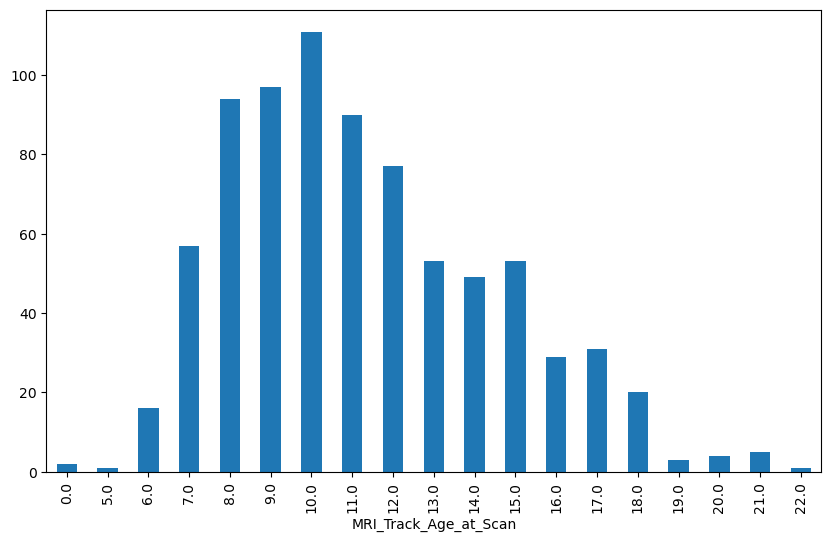

In [42]:
train_quan['MRI_Track_Age_at_Scan'].round().value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

**Checking if age correlates with ADHD diagnosis or sex (e.g., using boxplots or correlation analysis)**

In [43]:
age_train = pd.merge(train_quan, train_sol, on='participant_id', how='inner')

In [44]:
age_train[['MRI_Track_Age_at_Scan', 'ADHD_Outcome', 'Sex_F']].corr(method='spearman')

,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
MRI_Track_Age_at_Scan,1.000000,0.015844,-0.036466
ADHD_Outcome,0.015844,1.000000,-0.139059
Sex_F,-0.036466,-0.139059,1.000000


✅  Since age has almost no correlation with ADHD or sex, it’s not adding useful predictive power.

In [45]:
age_train.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
count,1117.000000,1129.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1125.000000,1125.000000,1125.000000,1125.00000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,793.000000,1129.000000,1129.000000
mean,59.649141,13.401240,3.834526,13.358676,39.712880,17.931127,16.662791,25.454383,2.046222,12.095111,2.301333,7.52800,4.090667,5.481778,4.567111,2.265778,7.728000,11.248889,0.684677,0.346324
std,49.805728,2.164191,1.350880,3.577155,4.821508,3.322382,5.183981,3.080126,2.018067,6.502725,2.149412,4.12444,2.817515,2.802972,3.513343,2.086973,2.096593,3.249396,0.464850,0.476009
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.00000,2.000000,3.000000,2.000000,0.000000,6.000000,8.817362,0.000000,0.000000
50%,80.000000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.00000,4.000000,5.000000,4.000000,2.000000,8.000000,10.731234,1.000000,0.000000
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,20.000000,28.000000,3.000000,16.000000,4.000000,10.00000,6.000000,8.000000,7.000000,4.000000,10.000000,13.463381,1.000000,1.000000
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.00000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453,1.000000,1.000000


Age:

Until 6 years old brain is developing. At age 7 brain is 95% of size of adult brain.

Proposed Age Groups for Brain Development:

Infants & Toddlers (0-2 years)

Rapid brain growth, synaptic overproduction, and pruning start.
Development of sensory and motor functions.

Early Childhood (3-6 years)

Significant language development.
Strengthening of neural pathways for movement and emotion regulation.

Middle Childhood (6-10 years)

Improved cognitive functions, attention, and problem-solving.
Growth in prefrontal cortex for executive functioning.

Early Adolescence (10-14 years)

Onset of puberty, increased limbic system activity.
Prefrontal cortex still developing, leading to risk-taking behaviors.

Mid Adolescence (14-18 years)

Strengthening of executive function, impulse control starts improving.
Increasing white matter, pruning of unused neural connections.

Late Adolescence & Early Adulthood (19-21 years)

Continued maturation of the prefrontal cortex (responsible for decision-making and reasoning).

Near-complete myelination, but emotional regulation still developing.


These divisions align with key neurodevelopmental changes.
They reflect cognitive, emotional, and behavioral transformations.
They match findings from MRI studies on brain maturation.

**It makes sense to consider only group of age 6-18**

In [46]:
filtered_age = age_train[(age_train['MRI_Track_Age_at_Scan'] < 6) | (age_train['MRI_Track_Age_at_Scan'] > 19)]['participant_id'].tolist()
len(filtered_age)

16

It less than 2 % of data base. Let's treat them as an outliers. And delete from database

In [47]:
filtered_data = age_train[age_train['participant_id'].isin(filtered_age)]

sex_counts = filtered_data['Sex_F'].value_counts()
adhd_counts = filtered_data['ADHD_Outcome'].value_counts()
print("Sex_F counts for filtered participants:\n", sex_counts)
print("\nADHD_Outcome counts for filtered participants:\n", adhd_counts)


Sex_F counts for filtered participants:
 Sex_F
1    9
0    7
Name: count, dtype: int64

ADHD_Outcome counts for filtered participants:
 ADHD_Outcome
1    11
0     5
Name: count, dtype: int64


In [48]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
train_cat.info()
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_fcm.info()
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
train_quan.info()
print("\nTRAINING_SOLUTIONS.xlsx")
train_sol.info()


TRAIN_CATEGORICAL_METADATA.xlsx
<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1212
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1129 non-null   object 
 1   PreInt_Demos_Fam_Child_Ethnicity  1129 non-null   float64
 2   PreInt_Demos_Fam_Child_Race       1129 non-null   float64
 3   Barratt_Barratt_P1_Edu            1115 non-null   float64
 4   Barratt_Barratt_P1_Occ            1102 non-null   float64
 5   Barratt_Barratt_P2_Edu            945 non-null    float64
 6   Barratt_Barratt_P2_Occ            924 non-null    float64
dtypes: float64(6), object(1)
memory usage: 70.6+ KB

TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 171.4+ MB

TRAIN_QUANTIT

In [49]:
filtered_participants = set(filtered_age)

train_cat = train_cat[~train_cat['participant_id'].isin(filtered_participants)]
train_fcm = train_fcm[~train_fcm['participant_id'].isin(filtered_participants)]
train_quan = train_quan[~train_quan['participant_id'].isin(filtered_participants)]
train_sol = train_sol[~train_sol['participant_id'].isin(filtered_participants)]

In [50]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
train_cat.info()
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_fcm.info()
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
train_quan.info()
print("\nTRAINING_SOLUTIONS.xlsx")
train_sol.info()


TRAIN_CATEGORICAL_METADATA.xlsx
<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1212
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1113 non-null   object 
 1   PreInt_Demos_Fam_Child_Ethnicity  1113 non-null   float64
 2   PreInt_Demos_Fam_Child_Race       1113 non-null   float64
 3   Barratt_Barratt_P1_Edu            1099 non-null   float64
 4   Barratt_Barratt_P1_Occ            1087 non-null   float64
 5   Barratt_Barratt_P2_Edu            930 non-null    float64
 6   Barratt_Barratt_P2_Occ            911 non-null    float64
dtypes: float64(6), object(1)
memory usage: 69.6+ KB

TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 169.0+ MB

TRAIN_QUANTIT

**Checking Brain Development vs. Age**

01_eda.ipynb

Correlations between age and brain development - moderate with few regions around 0.3

    Correlation between 'MRI_Track_Age_at_Scan' and '21throw_89thcolumn': -0.311
    Correlation between 'MRI_Track_Age_at_Scan' and '23throw_89thcolumn': -0.307
    Correlation between 'MRI_Track_Age_at_Scan' and '23throw_139thcolumn': 0.317
    Correlation between 'MRI_Track_Age_at_Scan' and '37throw_40thcolumn': 0.303
    Correlation between 'MRI_Track_Age_at_Scan' and '37throw_41thcolumn': 0.317
    Correlation between 'MRI_Track_Age_at_Scan' and '37throw_114thcolumn': 0.320
    Correlation between 'MRI_Track_Age_at_Scan' and '37throw_145thcolumn': 0.306
    Correlation between 'MRI_Track_Age_at_Scan' and '40throw_91thcolumn': -0.313
    Correlation between 'MRI_Track_Age_at_Scan' and '40throw_138thcolumn': 0.317
    Correlation between 'MRI_Track_Age_at_Scan' and '40throw_139thcolumn': 0.302
    Correlation between 'MRI_Track_Age_at_Scan' and '41throw_89thcolumn': -0.332
    Correlation between 'MRI_Track_Age_at_Scan' and '41throw_138thcolumn': 0.309
    Correlation between 'MRI_Track_Age_at_Scan' and '41throw_139thcolumn': 0.336
    Correlation between 'MRI_Track_Age_at_Scan' and '48throw_81thcolumn': -0.304
    Correlation between 'MRI_Track_Age_at_Scan' and '48throw_91thcolumn': -0.309
    Correlation between 'MRI_Track_Age_at_Scan' and '66throw_138thcolumn': -0.305
    Correlation between 'MRI_Track_Age_at_Scan' and '68throw_138thcolumn': -0.323
    Correlation between 'MRI_Track_Age_at_Scan' and '69throw_138thcolumn': -0.302
    Correlation between 'MRI_Track_Age_at_Scan' and '69throw_159thcolumn': -0.317
    Correlation between 'MRI_Track_Age_at_Scan' and '70throw_177thcolumn': -0.311
    Correlation between 'MRI_Track_Age_at_Scan' and '74throw_138thcolumn': -0.303
    Correlation between 'MRI_Track_Age_at_Scan' and '74throw_148thcolumn': -0.300
    Correlation between 'MRI_Track_Age_at_Scan' and '76throw_158thcolumn': 0.310
    Correlation between 'MRI_Track_Age_at_Scan' and '80throw_138thcolumn': -0.303
    Correlation between 'MRI_Track_Age_at_Scan' and '80throw_151thcolumn': -0.377
    Correlation between 'MRI_Track_Age_at_Scan' and '80throw_152thcolumn': -0.327
    Correlation between 'MRI_Track_Age_at_Scan' and '80throw_159thcolumn': -0.316
    Correlation between 'MRI_Track_Age_at_Scan' and '81throw_167thcolumn': -0.308
    Correlation between 'MRI_Track_Age_at_Scan' and '84throw_151thcolumn': -0.321
    Correlation between 'MRI_Track_Age_at_Scan' and '87throw_151thcolumn': -0.337
    Correlation between 'MRI_Track_Age_at_Scan' and '88throw_151thcolumn': -0.348
    Correlation between 'MRI_Track_Age_at_Scan' and '88throw_152thcolumn': -0.310
    Correlation between 'MRI_Track_Age_at_Scan' and '114throw_139thcolumn': 0.303
    Correlation between 'MRI_Track_Age_at_Scan' and '127throw_139thcolumn': 0.304
    Correlation between 'MRI_Track_Age_at_Scan' and '138throw_145thcolumn': 0.329
    Correlation between 'MRI_Track_Age_at_Scan' and '139throw_145thcolumn': 0.305

Correlation with other features:

Correlation between 'APQ_P_APQ_P_PM' and 'MRI_Track_Age_at_Scan': 0.550

`APQ_P_APQ_P_PM`: Poor Monitoring/Supervision Score (int)

✅ No correlations with missing age and other quantity or categorical data

Dropping AGE column - Too many missing values. After analise it doesnt have impact on other data

In [51]:
train_quan.drop('MRI_Track_Age_at_Scan', axis = 1, inplace=True)

In [52]:
print(train_quan.isnull().sum())
print(train_cat.isnull().sum())

participant_id                 0
EHQ_EHQ_Total                 12
ColorVision_CV_Score           0
APQ_P_APQ_P_CP                 8
APQ_P_APQ_P_ID                 8
APQ_P_APQ_P_INV                8
APQ_P_APQ_P_OPD                8
APQ_P_APQ_P_PM                 8
APQ_P_APQ_P_PP                 8
SDQ_SDQ_Conduct_Problems       4
SDQ_SDQ_Difficulties_Total     4
SDQ_SDQ_Emotional_Problems     4
SDQ_SDQ_Externalizing          4
SDQ_SDQ_Generating_Impact      4
SDQ_SDQ_Hyperactivity          4
SDQ_SDQ_Internalizing          4
SDQ_SDQ_Peer_Problems          4
SDQ_SDQ_Prosocial              4
dtype: int64
participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity      0
PreInt_Demos_Fam_Child_Race           0
Barratt_Barratt_P1_Edu               14
Barratt_Barratt_P1_Occ               26
Barratt_Barratt_P2_Edu              183
Barratt_Barratt_P2_Occ              202
dtype: int64


    Barratt_Barratt_P1_Edu
    Barratt_Barratt_P1_Occ
    Barratt_Barratt_P2_Edu
    Barratt_Barratt_P2_Occ

These features don’t correlate with ADHD or sex, they likely won’t help the model.

Keeping them may just add noise and make the model overfit or slower.

Deleting this columns

In [53]:
train_cat.drop('Barratt_Barratt_P1_Edu',  axis = 1, inplace=True)
train_cat.drop('Barratt_Barratt_P1_Occ', axis = 1, inplace=True)
train_cat.drop('Barratt_Barratt_P2_Edu',  axis = 1, inplace=True)
train_cat.drop('Barratt_Barratt_P2_Occ', axis = 1, inplace=True)

In [54]:
cols_to_check = [
    'EHQ_EHQ_Total', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'
]

participants_to_drop = train_quan[train_quan[cols_to_check].isnull().any(axis=1)]['participant_id']

train_cat = train_cat[~train_cat['participant_id'].isin(participants_to_drop)]
train_fcm = train_fcm[~train_fcm['participant_id'].isin(participants_to_drop)]
train_quan = train_quan[~train_quan['participant_id'].isin(participants_to_drop)]

train_sol = train_sol[~train_sol['participant_id'].isin(participants_to_drop)]


In [55]:
print(train_quan.isnull().sum())
print(train_cat.isnull().sum())
print(train_sol.isnull().sum())
print(train_fcm.isnull().sum())

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
dtype: int64
participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
dtype: int64
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197

✅ no NULL values in TRAIN DATASET

    Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Difficulties_Total': 0.706
    Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Externalizing': 0.780
    Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Externalizing': 0.877
    Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Generating_Impact': 0.716
    Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Hyperactivity': 0.777
    Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Internalizing': 0.816
    Correlation between 'SDQ_SDQ_Emotional_Problems' and 'SDQ_SDQ_Internalizing': 0.816
    Correlation between 'SDQ_SDQ_Externalizing' and 'SDQ_SDQ_Hyperactivity': 0.904
    Correlation between 'SDQ_SDQ_Internalizing' and 'SDQ_SDQ_Peer_Problems': 0.822


* **Strength and Difficulties Questionnaire**
    * `SDQ_SDQ_Conduct_Problems`: Conduct problems scale (int)
    * `SDQ_SDQ_Difficulties_Total`: Total Difficulties Score (int)
    * `SDQ_SDQ_Emotional_Problems`: Emotional Problems Scale (int)
    * `SDQ_SDQ_Externalizing`: Externalizing Score (int)
    * `SDQ_SDQ_Generating_Impact`: Generating Impact Scores (int)
    * `SDQ_SDQ_Hyperactivity`: Hyperactivity Scale (int)
    * `SDQ_SDQ_Internalizing`: Internalizing Score (int)
    * `SDQ_SDQ_Peer_Problems`: Peer Problems Scale (int)
    * `SDQ_SDQ_Prosocial`: Prosocial Scale (int)

Keeping the 5 original SDQ subscales:

    SDQ_Emotional_Problems
    SDQ_Conduct_Problems
    SDQ_Hyperactivity
    SDQ_Peer_Problems
    SDQ_Prosocial
    SDQ_Generating_Impact

And droping:

    SDQ_Externalizing (it's sum of Conduct + Hyperactivity)
    SDQ_Internalizing (Emotional + Peer)
    SDQ_Difficulties_Total (sum of all except Prosocial)
    
Why? Because we don’t want to duplicate signal — that just inflates importance and adds collinearity.

In [56]:
train_quan.drop('SDQ_SDQ_Externalizing',  axis = 1, inplace=True)
train_quan.drop('SDQ_SDQ_Internalizing',  axis = 1, inplace=True)
train_quan.drop('SDQ_SDQ_Difficulties_Total',  axis = 1, inplace=True)

In [57]:
train_quan.info()
train_cat.info()
train_sol.info()
train_fcm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1212
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1090 non-null   object 
 1   EHQ_EHQ_Total               1090 non-null   float64
 2   ColorVision_CV_Score        1090 non-null   float64
 3   APQ_P_APQ_P_CP              1090 non-null   float64
 4   APQ_P_APQ_P_ID              1090 non-null   float64
 5   APQ_P_APQ_P_INV             1090 non-null   float64
 6   APQ_P_APQ_P_OPD             1090 non-null   float64
 7   APQ_P_APQ_P_PM              1090 non-null   float64
 8   APQ_P_APQ_P_PP              1090 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1090 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1090 non-null   float64
 11  SDQ_SDQ_Generating_Impact   1090 non-null   float64
 12  SDQ_SDQ_Hyperactivity       1090 non-null   float64
 13  SDQ_SDQ_Peer_Problems       1090 non-n

We have 1082 participants from 1213 of whole package = 89,2 %

We have to now transform test dataset so it will have same amount of features

In [58]:
file_path_test_cat = "../data/raw/TEST/TEST_CATEGORICAL.xlsx"
file_path_test_fun_cm = "../data/raw/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
file_path_test_quan = "../data/raw/TEST/TEST_QUANTITATIVE_METADATA.xlsx"

test_cat = pd.read_excel(file_path_test_cat)
test_fcm = pd.read_csv(file_path_test_fun_cm)
test_quan = pd.read_excel(file_path_test_quan)

In [59]:
cat_columns = train_cat.columns
quan_columns = train_quan.columns

In [60]:
test_cat = test_cat[cat_columns]
test_quan = test_quan[quan_columns]

In [61]:
train_quan.info()
train_cat.info()
test_quan.info()
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1212
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1090 non-null   object 
 1   EHQ_EHQ_Total               1090 non-null   float64
 2   ColorVision_CV_Score        1090 non-null   float64
 3   APQ_P_APQ_P_CP              1090 non-null   float64
 4   APQ_P_APQ_P_ID              1090 non-null   float64
 5   APQ_P_APQ_P_INV             1090 non-null   float64
 6   APQ_P_APQ_P_OPD             1090 non-null   float64
 7   APQ_P_APQ_P_PM              1090 non-null   float64
 8   APQ_P_APQ_P_PP              1090 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1090 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1090 non-null   float64
 11  SDQ_SDQ_Generating_Impact   1090 non-null   float64
 12  SDQ_SDQ_Hyperactivity       1090 non-null   float64
 13  SDQ_SDQ_Peer_Problems       1090 non-n

A lot of MRI features are highly correlated.

Highly correlated features (corr > 0.8) to cut of redundancy. 

That can be a very good step, especially for:

✅ Model performance (faster training, lower overfitting risk)
✅ Interpretability
✅ Memory + computation savings

In [62]:
def find_significant_correlations(corr_matrix, threshold=0.3):
    significant_corrs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                significant_corrs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    return significant_corrs

In [63]:
numerical_data_fcm= train_fcm.select_dtypes(include=np.number)

spearman_corr_fcm = numerical_data_fcm.corr(method='spearman')

significant_spearman_fcm = find_significant_correlations(spearman_corr_fcm, threshold=0.7)

print("\nSignificant Spearman Correlations:")
for corr in significant_spearman_fcm:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")


Significant Spearman Correlations:
Correlation between '0throw_1thcolumn' and '1throw_100thcolumn': 0.748398309037216
Correlation between '0throw_2thcolumn' and '2throw_100thcolumn': 0.7641624295186039
Correlation between '0throw_3thcolumn' and '3throw_100thcolumn': 0.8211701614986815
Correlation between '0throw_4thcolumn' and '4throw_100thcolumn': 0.8169189357471068
Correlation between '0throw_5thcolumn' and '0throw_105thcolumn': 0.7375175643897899
Correlation between '0throw_5thcolumn' and '5throw_100thcolumn': 0.7780071010207031
Correlation between '0throw_7thcolumn' and '0throw_9thcolumn': 0.7574995985993846
Correlation between '0throw_7thcolumn' and '0throw_106thcolumn': 0.7266434821470373
Correlation between '0throw_7thcolumn' and '7throw_100thcolumn': 0.7018527484863242
Correlation between '0throw_8thcolumn' and '0throw_107thcolumn': 0.746873341131312
Correlation between '0throw_8thcolumn' and '8throw_100thcolumn': 0.7998398845319095
Correlation between '0throw_9thcolumn' and '

In [64]:
to_drop = set()
for corr in significant_spearman_fcm:
    if abs(corr['correlation']) >= 0.7:
        to_drop.add(corr['feature2'])

len(to_drop)

6865

In [65]:
cleaned_fcm = train_fcm.drop(columns=list(to_drop))

In [66]:
numerical_data_fcm= cleaned_fcm.select_dtypes(include=np.number)

spearman_corr_fcm = numerical_data_fcm.corr(method='spearman')

significant_spearman_fcm = find_significant_correlations(spearman_corr_fcm, threshold=0.7)

print("\nSignificant Spearman Correlations:")
for corr in significant_spearman_fcm:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")


Significant Spearman Correlations:


No correlations > 0.7

In [67]:
cleaned_fcm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1212
Columns: 13036 entries, participant_id to 198throw_199thcolumn
dtypes: float64(13035), object(1)
memory usage: 108.4+ MB


In [68]:
fcm_columns = cleaned_fcm.columns
test_fcm = test_fcm[fcm_columns]

In [69]:
test_fcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 13036 entries, participant_id to 198throw_199thcolumn
dtypes: float64(13035), object(1)
memory usage: 30.2+ MB


### ✅ Same sizes for test and train data

You have two types of data:

- MRI correlation data (already scaled: values between -1 and 1) → ✅ No scaling needed

- Psychometric/behavioral data → Needs scaling

✅ Best overall scaler for consistency across different models:

StandardScaler (z-score scaling)

It standardizes the data to mean = 0 and std = 1. 

This works well for most models and won’t squash outliers as aggressively as MinMax, which might be safer for the psychometric scores.

In [70]:
train_quan.iloc[:, 1:]

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,4.0,5.0,8.0,2.0,9.0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,4.0,5.0,8.0,3.0,8.0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,7.0,10.0,7.0,7.0,7.0
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,0.0,0.0,3.0,2.0,6.0
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,7.0,8.0,9.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,5.0,5.0,8.0,2.0,8.0
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,0.0,0.0,3.0,0.0,7.0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,3.0,3.0,7.0,2.0,9.0
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,0.0,5.0,7.0,2.0,7.0


In [71]:
test_quan.iloc[:, 1:]

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
0,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,3.0,2.0,7.0,0.0,8.0
1,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,8.0,7.0,3.0,3.0,9.0
2,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,1.0,1.0,5.0,0.0,9.0
3,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,4.0,8.0,6.0,1.0,6.0
4,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,6.0,5.0,10.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,7.0,5.0,6.0,4.0,7.0
300,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,2.0,5.0,9.0,3.0,8.0
301,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,4.0,4.0,3.0,3.0,10.0
302,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,2.0,6.0,5.0,9.0,0.0


In [72]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(train_quan.iloc[:, 1:])  # exclude participant_id

scaled_train_quan = pd.concat([train_quan[['participant_id']], pd.DataFrame(scaled_values, columns=train_quan.columns[1:], index=train_quan.index)], axis=1)

In [73]:
scaled_test_values = scaler.transform(test_quan.iloc[:, 1:])  # exclude participant_id

scaled_test_quan = pd.concat([test_quan[['participant_id']], pd.DataFrame(scaled_test_values, columns=test_quan.columns[1:], index=test_quan.index)],axis=1)

In [74]:
scaled_train_quan.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
count,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1.090000e+03,1090.000000,1.090000e+03,1.090000e+03
mean,-1.499310e-16,1.271154e-16,1.352639e-16,2.281559e-16,3.080105e-16,-2.526012e-16,1.311897e-16,-3.935690e-16,5.214993e-17,-5.826124e-17,2.281559e-17,0.000000,6.844678e-17,-1.857841e-16
std,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459e+00,1.000459,1.000459e+00,1.000459e+00
min,-3.197460e+00,-6.095753e+00,-1.363566e+00,-2.342471e+00,-3.472872e+00,-3.297059e+00,-2.278552e+00,-4.042677e+00,-1.013521e+00,-1.072471e+00,-1.459522e+00,-1.968564,-1.081401e+00,-3.684714e+00
25%,-2.622368e-01,2.777441e-01,-6.241198e-01,-6.656147e-01,-7.686959e-01,-5.856710e-01,-7.042731e-01,-7.911141e-01,-1.013521e+00,-6.044992e-01,-7.458031e-01,-0.536881,-1.081401e+00,-8.220353e-01
50%,4.047774e-01,2.777441e-01,-6.241198e-01,-1.066624e-01,6.335825e-02,1.685981e-02,-1.139186e-01,1.843546e-01,-2.449872e-02,-1.365275e-01,-3.208459e-02,-0.178960,-1.156271e-01,1.321910e-01
75%,6.943573e-01,2.777441e-01,1.153265e-01,7.317659e-01,6.873989e-01,6.193906e-01,4.764360e-01,8.346672e-01,4.700125e-01,7.994159e-01,6.816339e-01,0.894802,8.501469e-01,1.086417e+00
max,8.050260e-01,2.777441e-01,6.030897e+00,4.085479e+00,2.143494e+00,3.029514e+00,4.018563e+00,1.484980e+00,3.931591e+00,3.607246e+00,2.109071e+00,1.610643,3.264582e+00,1.086417e+00


In [75]:
scaled_test_quan.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
count,303.000000,295.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,-0.012592,-0.067937,-0.386166,-0.034134,-0.012937,-0.366758,-0.124813,-0.197057,-0.078642,0.046221,-0.051621,0.030044,-0.156161,0.001594
std,0.987232,0.904250,0.599135,1.013775,1.072016,1.012252,0.970378,1.067705,0.975671,1.001053,0.959155,1.009700,0.964477,0.994646
min,-3.198460,-6.095753,-1.363566,-2.062995,-4.096913,-3.297059,-1.491413,-5.018145,-1.013521,-1.072471,-1.459522,-1.968564,-1.081401,-3.684714
25%,-0.194395,-0.177506,-0.624120,-0.665615,-0.768696,-1.188202,-0.901058,-0.791114,-1.013521,-0.604499,-0.745803,-0.536881,-1.081401,-0.822035
50%,0.272095,0.277744,-0.624120,-0.106662,0.063358,-0.284406,-0.310703,-0.140802,-0.519010,-0.136528,-0.032085,0.178960,-0.598514,0.132191
75%,0.672544,0.277744,-0.624120,0.731766,0.687399,0.318125,0.476436,0.834667,0.470012,0.799416,0.681634,0.894802,0.367260,1.086417
max,0.806027,0.277744,3.073112,2.688099,2.143494,2.728248,2.837854,1.484980,3.931591,3.607246,2.109071,1.610643,3.264582,1.086417


* **Pre-Interview- Demographics/Family**
    * `PreInt_Demos_Fam_Child_Ethnicity`: Ethnicity of child (categorical int)
        * 0 = Not Hispanic or Latino
        * 1 = Hispanic or Latino
        * 2 = Decline to specify
        * 3 = Unknown
    * `PreInt_Demos_Fam_Child_Race`: Race of child (categorical int)
        * 0 = White/Caucasian
        * 1 = Black/African American
        * 2 = Hispanic
        * 3 = Asian
        * 4 = Indian
        * 5 = Native American Indian
        * 6 = American Indian/Alaskan Native
        * 7 = Native Hawaiian/Other Pacific Islander
        * 8 = Two or more races
        * 9 = Other race
        * 10 = Unknown
        * 11 = Choose not to specify

In [76]:
train_cat = pd.get_dummies(train_cat, columns=['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race'], drop_first=False)
test_cat = pd.get_dummies(test_cat, columns=['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race'], drop_first=False)

In [77]:
train_cat.columns

Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity_0.0',
       'PreInt_Demos_Fam_Child_Ethnicity_1.0',
       'PreInt_Demos_Fam_Child_Ethnicity_2.0',
       'PreInt_Demos_Fam_Child_Ethnicity_3.0',
       'PreInt_Demos_Fam_Child_Race_0.0', 'PreInt_Demos_Fam_Child_Race_1.0',
       'PreInt_Demos_Fam_Child_Race_2.0', 'PreInt_Demos_Fam_Child_Race_3.0',
       'PreInt_Demos_Fam_Child_Race_4.0', 'PreInt_Demos_Fam_Child_Race_7.0',
       'PreInt_Demos_Fam_Child_Race_8.0', 'PreInt_Demos_Fam_Child_Race_9.0',
       'PreInt_Demos_Fam_Child_Race_10.0', 'PreInt_Demos_Fam_Child_Race_11.0'],
      dtype='object')

In [78]:
test_cat.columns

Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity_0.0',
       'PreInt_Demos_Fam_Child_Ethnicity_1.0',
       'PreInt_Demos_Fam_Child_Ethnicity_2.0',
       'PreInt_Demos_Fam_Child_Ethnicity_3.0',
       'PreInt_Demos_Fam_Child_Race_0.0', 'PreInt_Demos_Fam_Child_Race_1.0',
       'PreInt_Demos_Fam_Child_Race_2.0', 'PreInt_Demos_Fam_Child_Race_3.0',
       'PreInt_Demos_Fam_Child_Race_4.0', 'PreInt_Demos_Fam_Child_Race_7.0',
       'PreInt_Demos_Fam_Child_Race_8.0', 'PreInt_Demos_Fam_Child_Race_9.0',
       'PreInt_Demos_Fam_Child_Race_11.0'],
      dtype='object')

    'PreInt_Demos_Fam_Child_Ethnicity_2.0'
    'PreInt_Demos_Fam_Child_Ethnicity_3.0'
Dropping this 2 columns = Unknown or not specified

    'PreInt_Demos_Fam_Child_Race_7.0'
    'PreInt_Demos_Fam_Child_Race_8.0' 
    'PreInt_Demos_Fam_Child_Race_9.0'
    'PreInt_Demos_Fam_Child_Race_11.0'

Dropping this columns = minority, unknown, other, not specified

In [79]:
print(train_cat.head())
print(test_cat.head())

  participant_id  PreInt_Demos_Fam_Child_Ethnicity_0.0  \
0   00aIpNTbG5uh                                 False   
1   00fV0OyyoLfw                                  True   
2   04X1eiS79T4B                                 False   
3   05ocQutkURd6                                 False   
4   06YUNBA9ZRLq                                  True   

   PreInt_Demos_Fam_Child_Ethnicity_1.0  PreInt_Demos_Fam_Child_Ethnicity_2.0  \
0                                  True                                 False   
1                                 False                                 False   
2                                  True                                 False   
3                                 False                                 False   
4                                 False                                 False   

   PreInt_Demos_Fam_Child_Ethnicity_3.0  PreInt_Demos_Fam_Child_Race_0.0  \
0                                 False                             True   
1           

### Delete columns:

* **Pre-Interview- Demographics/Family**
    * `PreInt_Demos_Fam_Child_Ethnicity`: Ethnicity of child (categorical int)
        * 2 = Decline to specify
        * 3 = Unknown
    * `PreInt_Demos_Fam_Child_Race`: Race of child (categorical int)
        * 10 = Unknown
        * 11 = Choose not to specify

In [80]:
train_cat.drop('PreInt_Demos_Fam_Child_Ethnicity_2.0',  axis = 1, inplace=True)
train_cat.drop('PreInt_Demos_Fam_Child_Ethnicity_3.0',  axis = 1, inplace=True)
train_cat.drop('PreInt_Demos_Fam_Child_Race_7.0',  axis = 1, inplace=True)
train_cat.drop('PreInt_Demos_Fam_Child_Race_8.0',  axis = 1, inplace=True)
train_cat.drop('PreInt_Demos_Fam_Child_Race_9.0',  axis = 1, inplace=True)
train_cat.drop('PreInt_Demos_Fam_Child_Race_11.0',  axis = 1, inplace=True)

In [81]:
test_cat.drop('PreInt_Demos_Fam_Child_Ethnicity_2.0',  axis = 1, inplace=True)
test_cat.drop('PreInt_Demos_Fam_Child_Ethnicity_3.0',  axis = 1, inplace=True)
test_cat.drop('PreInt_Demos_Fam_Child_Race_7.0',  axis = 1, inplace=True)
test_cat.drop('PreInt_Demos_Fam_Child_Race_8.0',  axis = 1, inplace=True)
test_cat.drop('PreInt_Demos_Fam_Child_Race_9.0',  axis = 1, inplace=True)
test_cat.drop('PreInt_Demos_Fam_Child_Race_11.0',  axis = 1, inplace=True)

    ✅ Handling nulls

    ✅ Deleting features

    ✅ Get Dummies for categorical data - and cleaning columns

    ✅ Standard Scaler for quantity data

    ✅ Test data scaling to fit train data

# 3. Dimensionality reduction

✅ Reasons to Use PCA

High Dimensionality (19,900 features):

Your dataset has many features (19,900 columns). PCA helps reduce the number of features by transforming them into principal components (PCs) while retaining as much variance as possible. This could improve computational efficiency, reduce overfitting, and simplify your model.

Correlated Features:

PCA is great when features are highly correlated. If your features are correlated (e.g., related brain scan features), PCA can help create new, uncorrelated components that might capture more meaningful information.

Noise Reduction:

By reducing dimensions, PCA can help reduce the noise in the data, especially when you have many irrelevant or noisy features.

Improve Model Training Time:

With fewer features, training models (especially complex ones like neural networks) can be faster and more efficient.

🚫 Reasons You Might Not Want to Use PCA

Interpretability:

The principal components created by PCA are linear combinations of your original features, making them harder to interpret. If interpretability of individual features is crucial (e.g., understanding which specific brain scan features influence ADHD prediction), PCA may not be ideal.

Loss of Information:

Although PCA retains most of the variance, you may lose some useful information if you discard too many components. For sensitive tasks like predicting ADHD, even small changes in feature space might matter.

Explaining the Targets:

For your multi-target prediction problem, it's important to check how the principal components correlate with ADHD_Outcome and Sex_F. PCA might create components that are not directly related to the targets, making your model performance worse.

In [82]:
X_train = cleaned_fcm.drop(columns=['participant_id'])
X_test = test_fcm.drop(columns=['participant_id'])

pca = PCA(n_components=0.95, svd_solver='full')  # Or set fixed number, like PCA(n_components=300)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

train_fcm_pca = pd.DataFrame(X_train_pca)
train_fcm_pca['participant_id'] = cleaned_fcm['participant_id'].values

test_fcm_pca = pd.DataFrame(X_test_pca)
test_fcm_pca['participant_id'] = test_fcm['participant_id'].values

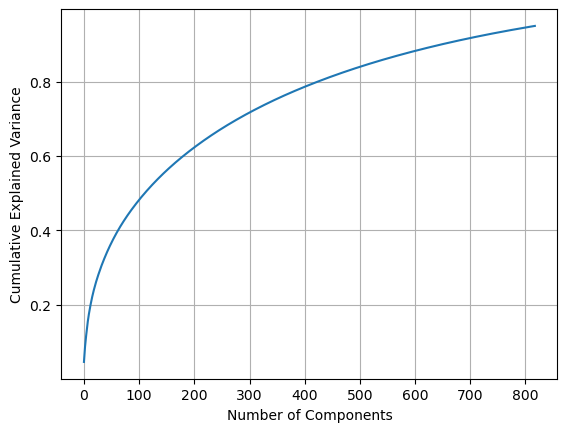

In [83]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [84]:
print("Number of PCA components:", train_fcm_pca.shape[1] - 1)

Number of PCA components: 818


# 4. Train Test Split

In [85]:
cleaned_fcm.info()
test_fcm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1212
Columns: 13036 entries, participant_id to 198throw_199thcolumn
dtypes: float64(13035), object(1)
memory usage: 108.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 13036 entries, participant_id to 198throw_199thcolumn
dtypes: float64(13035), object(1)
memory usage: 30.2+ MB


In [86]:
train_fcm_pca.info()
test_fcm_pca.info()
train_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Columns: 819 entries, 0 to participant_id
dtypes: float64(818), object(1)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 819 entries, 0 to participant_id
dtypes: float64(818), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1090 non-null   object
 1   ADHD_Outcome    1090 non-null   int64 
 2   Sex_F           1090 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.1+ KB


In [87]:
# First, merge train_fcm_pca with your targets on 'participant_id'
df_pca = train_fcm_pca.merge(train_sol, on='participant_id')

# Drop participant_id to get the features and target variables
X = df_pca.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y = df_pca[['ADHD_Outcome', 'Sex_F']]

In [88]:
# First, merge train_fcm_pca with your targets on 'participant_id'
full_df = cleaned_fcm.merge(train_sol, on='participant_id')

# Drop participant_id to get the features and target variables
X_full = full_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y_full = full_df[['ADHD_Outcome', 'Sex_F']]

In [89]:
# Create a combined stratification column
stratify_col = y['Sex_F'].astype(str) + "_" + y['ADHD_Outcome'].astype(str)

In [90]:
# Split X and y, stratify on ADHD outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=stratify_col)

In [91]:
# Split X and y, stratify on ADHD outcome
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=123, stratify=stratify_col)

In [92]:
# ADHD outcome
y_train_adhd = y_train['ADHD_Outcome']
y_test_adhd = y_test['ADHD_Outcome']

# Sex
y_train_sex = y_train['Sex_F']
y_test_sex = y_test['Sex_F']

In [93]:
print("Feature data with PCA:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("\nCombined target data:")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nIndividual target variables:")
print("y_train_adhd shape:", y_train_adhd.shape)
print("y_test_adhd shape:", y_test_adhd.shape)

print("y_train_sex shape:", y_train_sex.shape)
print("y_test_sex shape:", y_test_sex.shape)

print("\nFeature data - NO PCA:")
print("X_train shape:", X_train_full.shape)
print("X_test shape:", X_test_full.shape)

print("\nCombined target data:")
print("y_train shape:", y_train_full.shape)
print("y_test shape:", y_test_full.shape)

Feature data with PCA:
X_train shape: (872, 818)
X_test shape: (218, 818)

Combined target data:
y_train shape: (872, 2)
y_test shape: (218, 2)

Individual target variables:
y_train_adhd shape: (872,)
y_test_adhd shape: (218,)
y_train_sex shape: (872,)
y_test_sex shape: (218,)

Feature data - NO PCA:
X_train shape: (872, 13035)
X_test shape: (218, 13035)

Combined target data:
y_train shape: (872, 2)
y_test shape: (218, 2)



# 5. Data Export

In [94]:
# Export train datasets
train_cat.to_csv('../data/processed/train_cat_processed.csv', index=False)
train_fcm_pca.to_csv('../data/processed/train_fcm_pca.csv', index=False)
scaled_train_quan.to_csv('../data/processed/scaled_train_quan.csv', index=False)
train_sol.to_csv('../data/processed/train_sol.csv', index=False)

# Export test datasets
test_cat.to_csv('../data/processed/test_cat_processed.csv', index=False)
test_fcm_pca.to_csv('../data/processed/test_fcm_pca.csv', index=False)
scaled_test_quan.to_csv('../data/processed/scaled_test_quan.csv', index=False)

cleaned_fcm.to_csv('../data/processed/train_fcm_full.csv', index=False)
test_fcm.to_csv('../data/processed/test_fcm_full.csv', index=False)

Exporting data for model:

In [95]:
# Export feature splits
X_train.to_csv("../data/processed/model/X_train.csv", index=False)
X_test.to_csv("../data/processed/model/X_test.csv", index=False)

In [96]:
# Export combined targets
y_train.to_csv("../data/processed/model/y_train.csv", index=False)
y_test.to_csv("../data/processed/model/y_test.csv", index=False)

Let's have also train_full:

In [97]:
# Export feature splits
X_train_full.to_csv("../data/processed/model/X_train_full.csv", index=False)
X_test_full.to_csv("../data/processed/model/X_test_full.csv", index=False)

In [98]:
# Export combined targets
y_train_full.to_csv("../data/processed/model/y_train_full.csv", index=False)
y_test_full.to_csv("../data/processed/model/y_test_full.csv", index=False)

Seperate target datatabases

In [99]:
# Export individual targets
y_train_adhd.to_csv("../data/processed/model/y_train_adhd.csv", index=False)
y_test_adhd.to_csv("../data/processed/model/y_test_adhd.csv", index=False)

y_train_sex.to_csv("../data/processed/model/y_train_sex.csv", index=False)
y_test_sex.to_csv("../data/processed/model/y_test_sex.csv", index=False)